In [1]:
import matplotlib.pyplot as plt
import numpy as np


%matplotlib inline
%load_ext autoreload
%autoreload 2

## Simulate and modify a dynamical system

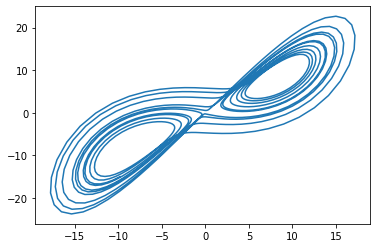

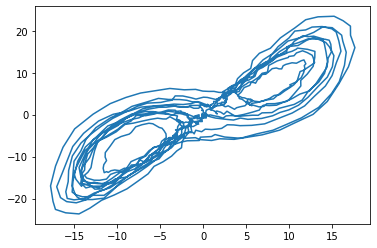

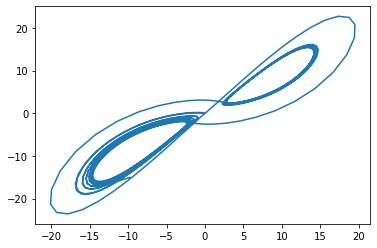

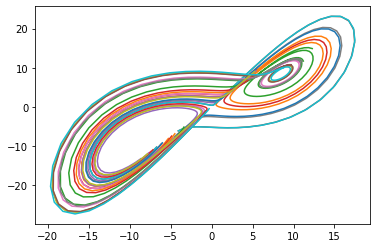

In [10]:
from dysts.flows import *

## Load and simulate an attractor
model = Lorenz()
sol = model.make_trajectory(1000, resample=True)
plt.figure()
plt.plot(sol[:, 0], sol[:, 1])

## Simulate with noise
sol = model.make_trajectory(1000, resample=True, noise=0.2)
plt.figure()
plt.plot(sol[:, 0], sol[:, 1])

## Change a parameter value
model.sigma *= 2
sol = model.make_trajectory(1000, resample=True)
plt.figure()
plt.plot(sol[:, 0], sol[:, 1])

# ## Solve for multiple initial conditions
model = Lorenz()
model.ic = model.ic[None, :] * np.random.random(20)[:, None]
sol = model.make_trajectory(100, resample=True)
plt.figure()
plt.plot(sol[..., 0].T, sol[..., 1].T);

## Load a precomputed time series collection

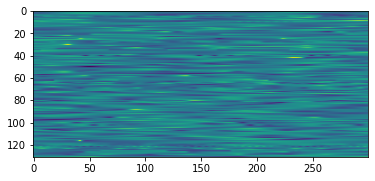

In [5]:
from dysts.datasets import load_dataset

## Load all univariate time series
data = load_dataset(data_format="numpy", standardize=True)
plt.imshow(data[:, :300])

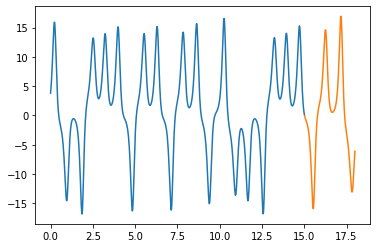

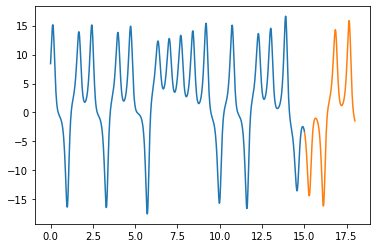

In [35]:
## Load all example time series with train/test split

plt.figure()
data = load_dataset(subsets="train", data_format="pandas", standardize=False)
plt.plot(np.array(data.loc["Lorenz"][["time"]]), np.array(data.loc["Lorenz"][["values"]]))

data = load_dataset(subsets="train_val", data_format="pandas", standardize=False)
plt.plot(np.array(data.loc["Lorenz"][["time"]]), np.array(data.loc["Lorenz"][["values"]]))

plt.figure()
data = load_dataset(subsets="test", data_format="pandas", standardize=False)
plt.plot(np.array(data.loc["Lorenz"][["time"]]), np.array(data.loc["Lorenz"][["values"]]))

data = load_dataset(subsets="test_val", data_format="pandas", standardize=False)
plt.plot(np.array(data.loc["Lorenz"][["time"]]), np.array(data.loc["Lorenz"][["values"]]))


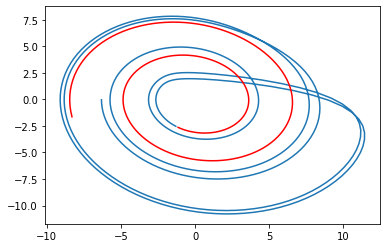

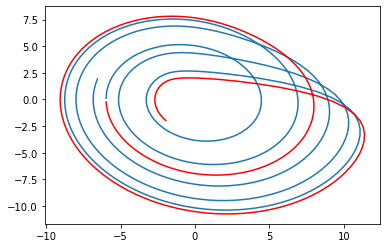

In [67]:
## Load all example multivariate time series with train/test split

plt.figure()
data = load_dataset(subsets="train", univariate=False, standardize=False)
plt.plot(*data.dataset["Rossler"]["values"].T[:2, -500:])

data = load_dataset(subsets="train_val", univariate=False, standardize=False)
plt.plot(*data.dataset["Rossler"]["values"].T[:2, :500], 'r')


plt.figure()
data = load_dataset(subsets="test", univariate=False, standardize=False)
plt.plot(*data.dataset["Rossler"]["values"].T[:2, -500:])

data = load_dataset(subsets="test_val", univariate=False, standardize=False)
plt.plot(*data.dataset["Rossler"]["values"].T[:2, :500], 'r')

## Generate an ensemble of trajectories

/Users/williamgilpin/program_repos/dysts/dysts/base.py:168: UserWarning: This system has at least one unbounded variable, which has been mapped to a bounded domain. Pass argument postprocess=False in order to generate trajectories from the raw system.
  warnings.warn("This system has at least one unbounded variable, which has been mapped to a bounded domain. Pass argument postprocess=False in order to generate trajectories from the raw system.")


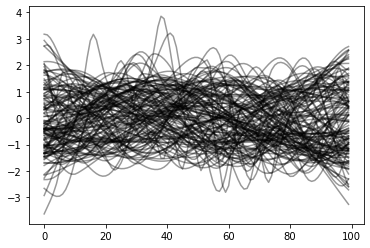

In [5]:
from dysts.base import make_trajectory_ensemble
from dysts.utils import standardize_ts

all_out = make_trajectory_ensemble(100, resample=True)
for attractor_name in all_out:
    plt.plot(standardize_ts(all_out[attractor_name])[:, 0], 'k', alpha=0.4)

## Generate dynamics from discrete-time maps

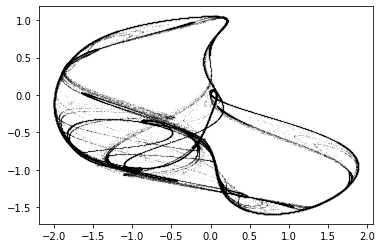

<Figure size 432x288 with 0 Axes>

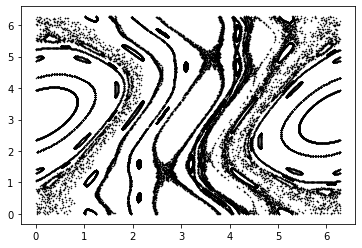

In [12]:
from dysts.maps import Chirikov, DeJong


sol =  DeJong().make_trajectory(100000)
plt.figure()
plt.plot(sol[..., 0], sol[..., 1], '.k', markersize=0.1)

model = Chirikov()
model.ic =  2 * np.pi * np.random.random((20, 2)) # uniform random initial conditions
sol = model.make_trajectory(2000)
plt.figure()
plt.figure()
plt.plot(np.mod(sol.T[0], 2*np.pi), np.mod(sol.T[1], 2*np.pi), '.k', markersize=1);